# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets

# EXPLORING DATA

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.shape

(150, 6)

In [11]:
df = iris.drop("Id",axis=1)

In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Data Visualisation

In [15]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

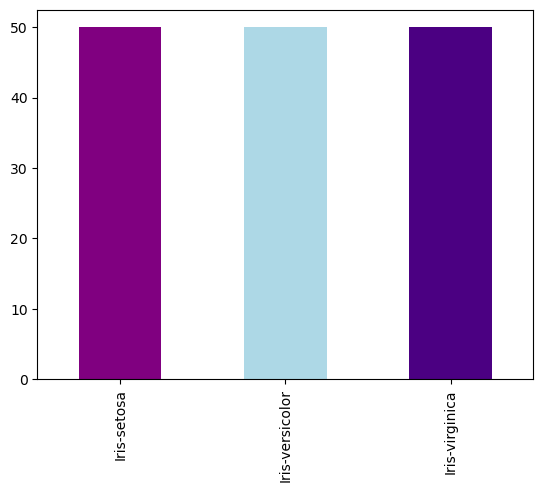

In [17]:
df["Species"].value_counts().plot(kind="bar", color=["purple", "lightblue","indigo"]);

C:\Users\XINSlim3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


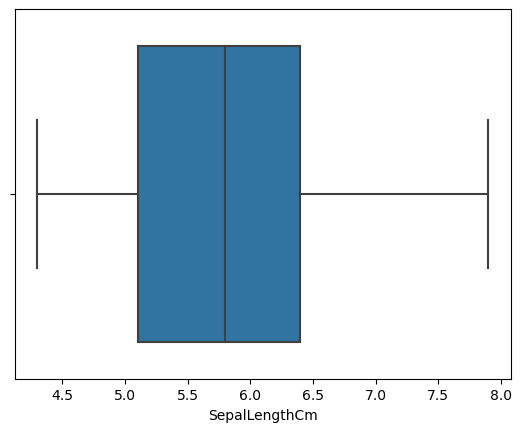

C:\Users\XINSlim3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


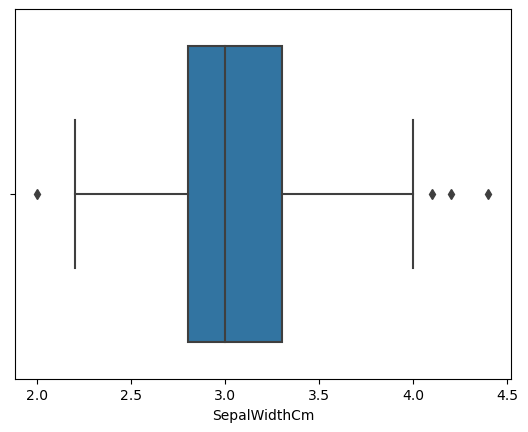

C:\Users\XINSlim3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


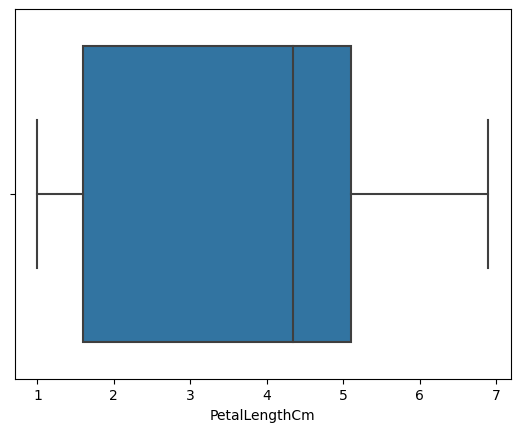

C:\Users\XINSlim3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


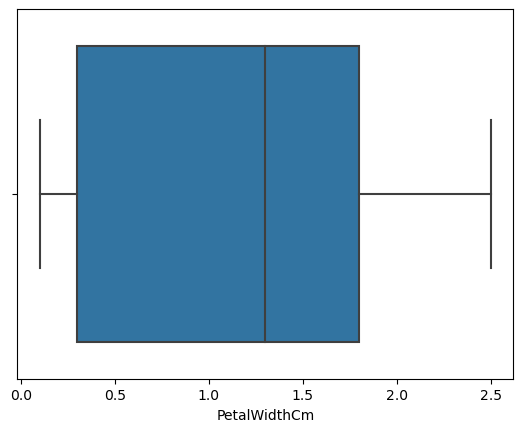

In [19]:
import seaborn as sns
for cl in df.columns:
    if df[cl].dtype != 'object': 
        sns.boxplot(df[cl])
        plt.show()

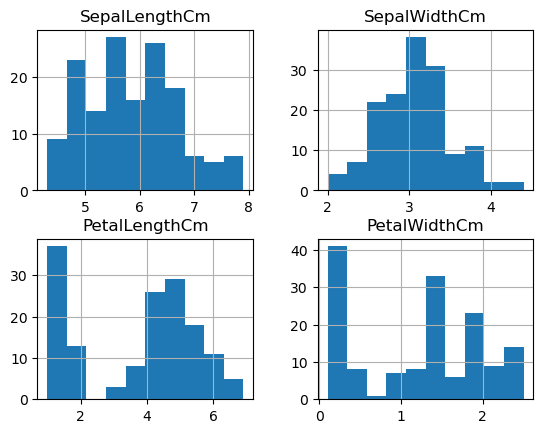

In [20]:
df.hist()
plt.show()

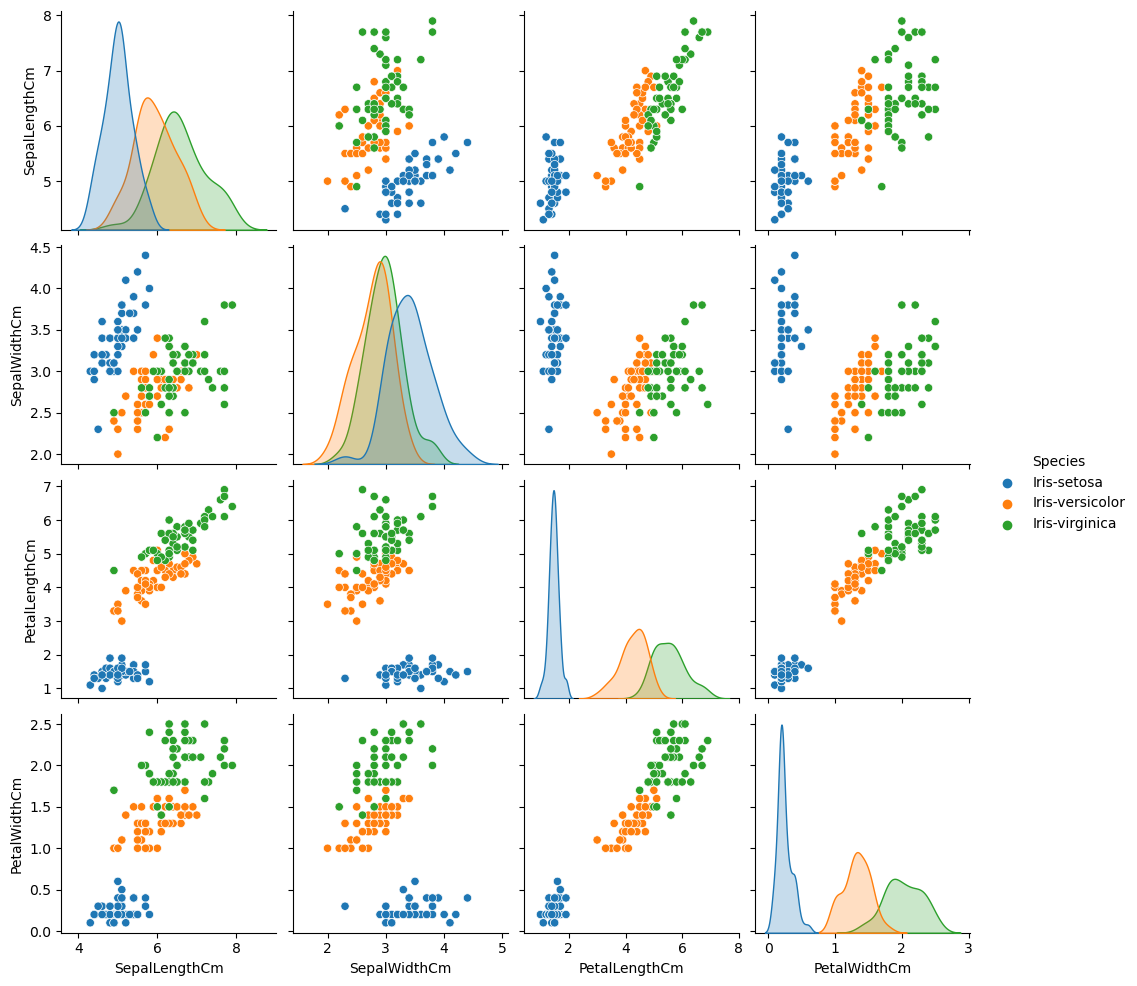

In [22]:
sns.pairplot(df,hue="Species");

In [23]:
dt = df.corr()

In [24]:
dt

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


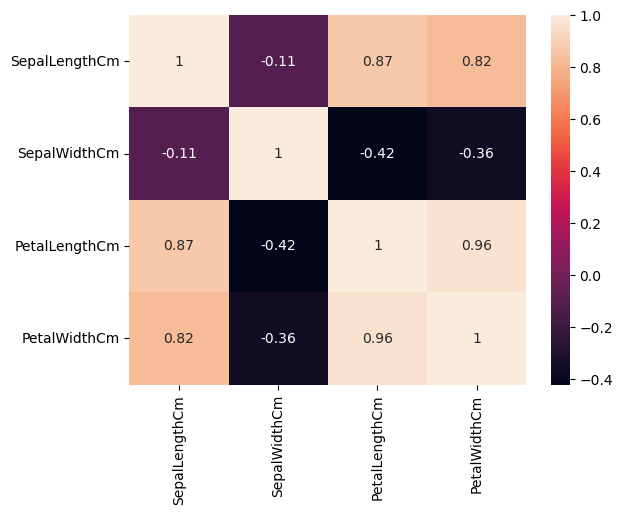

In [31]:
sns.heatmap(dt,annot = True);

# MODELLING

In [33]:
x = df.drop("Species", axis=1)
y = df["Species"]

In [34]:
x.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [35]:
y.head(10)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [36]:
from sklearn.model_selection import train_test_split

#split data into train and test

np.random.seed(10)

#split into test and train sets

x_train,x_test,y_train,y_test = train_test_split(x,
                                                y,
                                                test_size = 0.25)

In [37]:
SpeciesTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)

In [38]:
SpeciesTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
SpeciesTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
predTree = SpeciesTree.predict(x_test)

In [44]:
print(predTree)
print(y_test)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']
87     Iris-versicolor
111     Iris-virginica
10         Iris-setosa
91     Iris-versicolor
49         Iris-setosa
60     Iris-versicolor
72     Iris-versicolor
67     Iris-versicolor
39         Iris-setosa
55     Iris-versicolor
66     Iris-versicolor
142     Iris-virginica
53     Iris-versicolor
1          Iris-setosa
19         Iris-setosa
112     Iris-vi

In [45]:
from sklearn import metrics

In [46]:
print("Decision tree accuracy: ",metrics.accuracy_score(y_test,predTree))

Decision tree accuracy:  0.9736842105263158


# Visualising Tree

In [48]:
from sklearn import tree

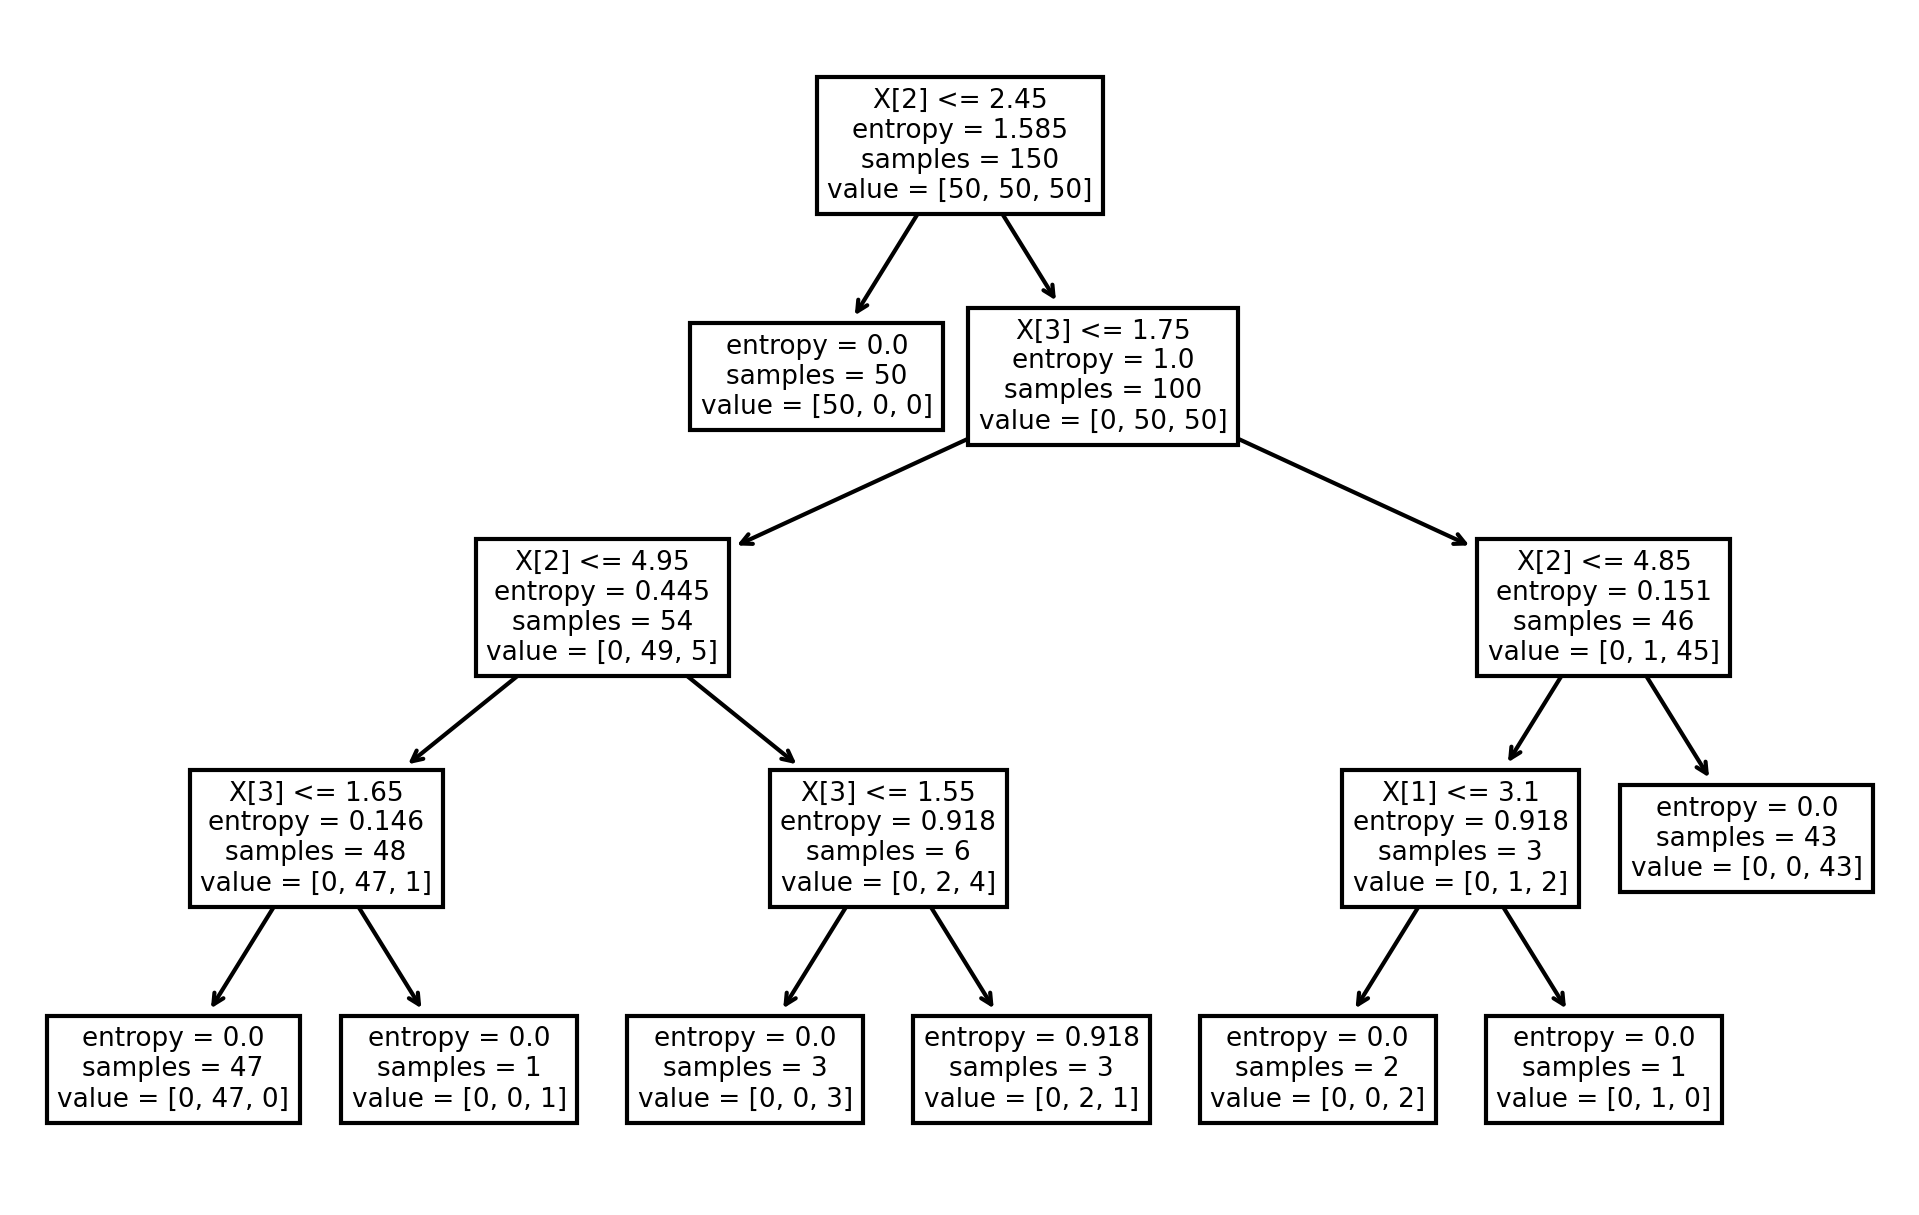

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5), dpi = 300)

tree.plot_tree(SpeciesTree);

In [58]:
fn = ['Sepal Length (in cm)','Sepal Width (in cm)','Petal Length (in cm)','Petal Width (in cm)']
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

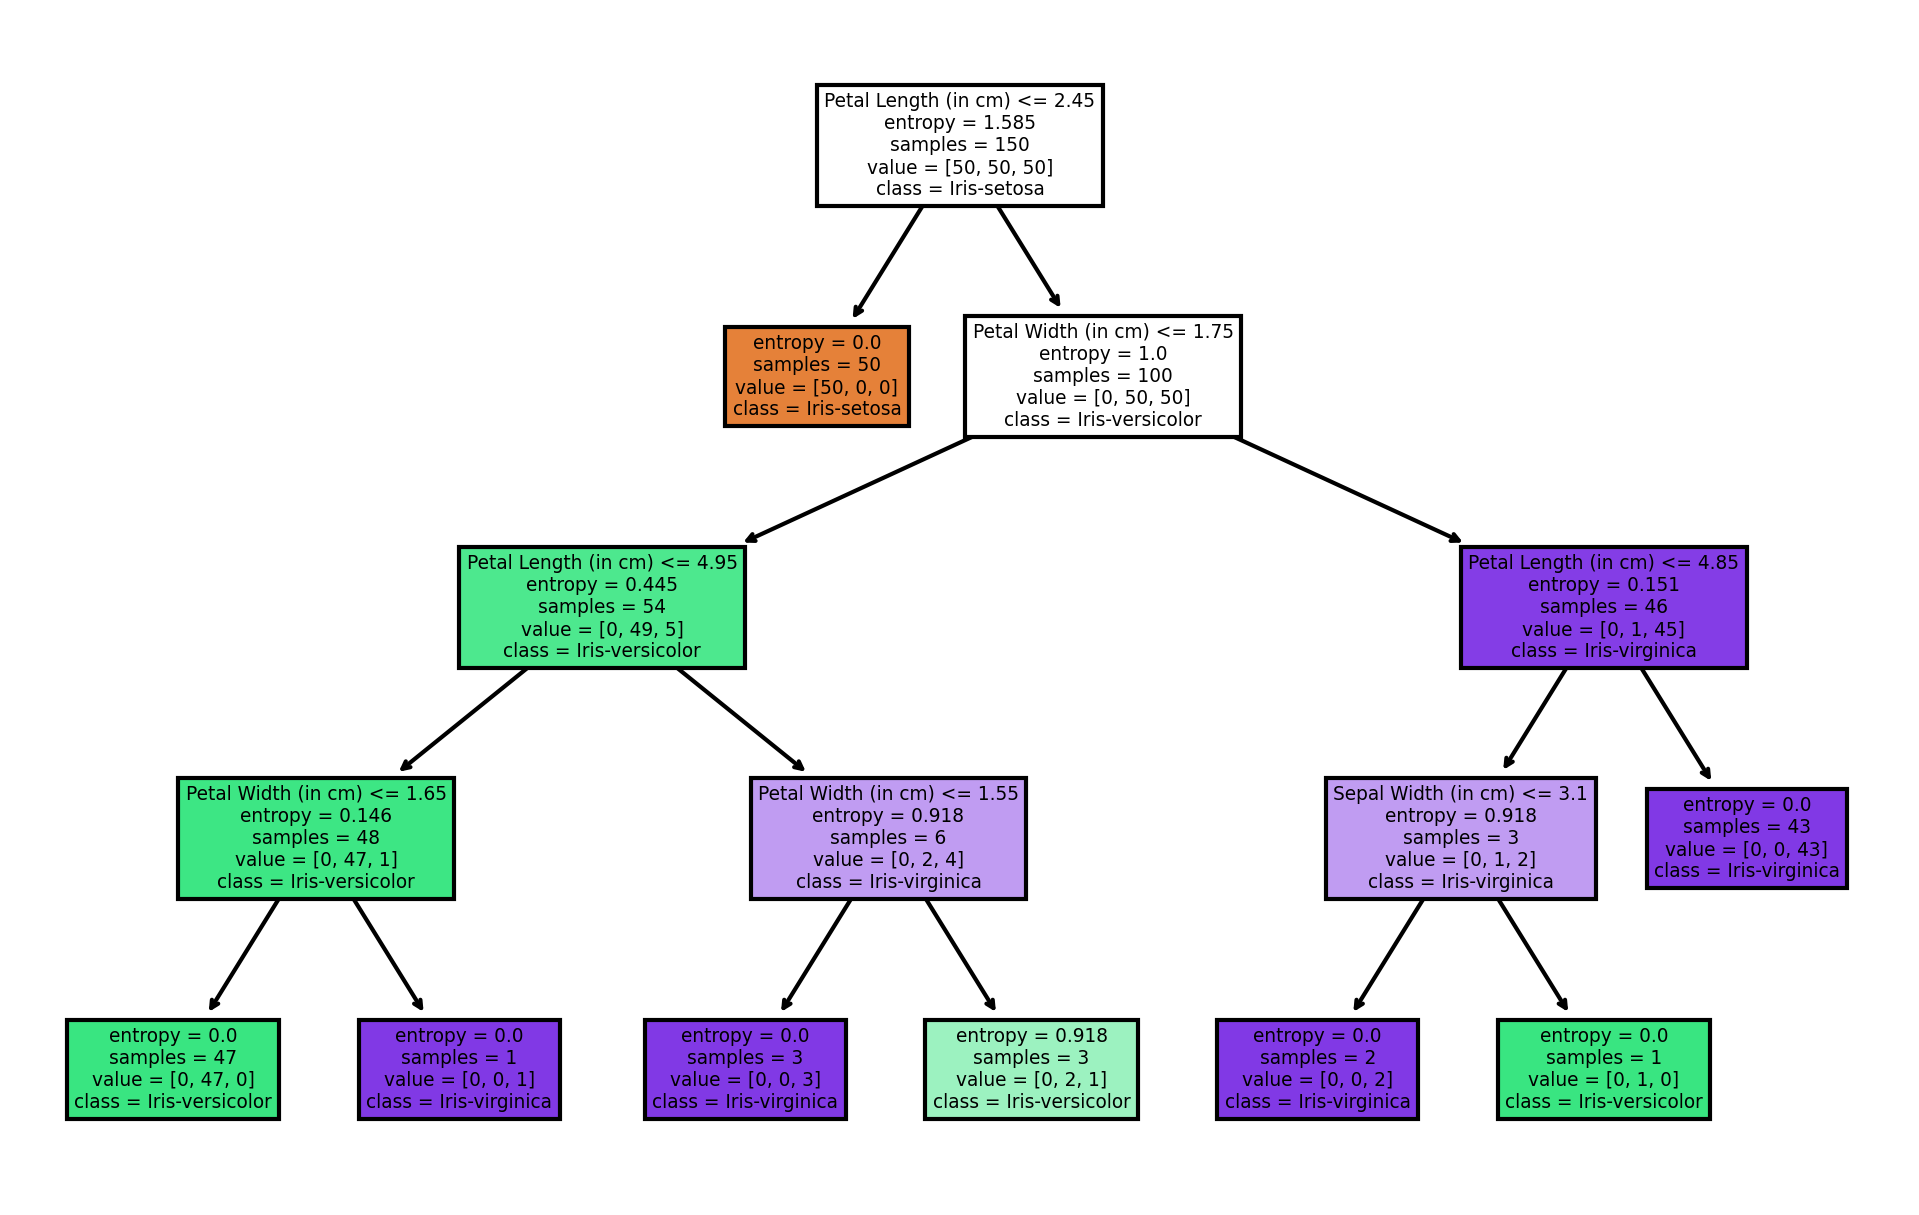

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5), dpi = 300)

tree.plot_tree(SpeciesTree,
               feature_names = fn, 
               class_names=cn,
               filled = True);